# 01. Loading dataset using Pandas DataFrame

In this section, our focus is on handling data using DataFrames. We'll begin by loading CSV files into these DataFrames. Since there are multiple CSV files, we'll need to merge them together to create a comprehensive superset DataFrame. As we move forward, our task involves removing students from the DataFrame who don't have a final score available. This process will help us streamline the data for our analysis.

## Step 01: Load CSV files

In [1]:
import pandas as pd
import numpy as np

```
Prompt: 
in Pandas, load a CSV file into DataFrame
```

Below is the output example from ChatGPT

```Python
# Load the CSV file into a DataFrame
df = pd.read_csv('path_to_your_file.csv')

# Display the first few rows of the DataFrame
print(df.head())
```

In [2]:
data_path = '../../data/'

In [3]:
df_br = pd.read_csv(data_path + 'br.csv').drop(['Unnamed: 0','score','class'],axis=1)
df_score = pd.read_csv(data_path + 'score.csv')
df_sill = pd.read_csv(data_path + 'sill.csv')
df_moti = pd.read_csv(data_path + 'srl_motivation.csv')
df_stra = pd.read_csv(data_path + 'srl_strategy.csv')
df_vscode = pd.read_csv(data_path + 'viscode.csv').drop(['Unnamed: 0','score','class'],axis=1)

In [4]:
df_vscode

,userid,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AssertionError,AttributeError,AxisError,...,XLRDError,ZeroDivisionError,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Viscode-spent_time
0,019acd030e0cdf674dda03e2a8ca4369,507,887,670,4827,254,70,0.0,8.0,0.0,...,0.0,0.0,1368.0,324,2388,254.0,2256,132.0,7.0,0 days 01:24:59.160120
1,01ea38c4c3cc5fba869732fc641ca884,176,582,264,1521,73,35,0.0,7.0,0.0,...,0.0,0.0,3543.0,108,1130,73.0,1020,110.0,8.0,0 days 00:50:32.025803
2,023c88ec58c8cf0abcfbcea4166793ad,89,588,137,1563,79,44,0.0,8.0,0.0,...,0.0,0.0,3472.0,123,937,79.0,811,126.0,6.0,0 days 00:54:26.187369
3,02d679ad650962b6ae8bf8adbeeb33c1,69,545,150,1119,41,24,0.0,2.0,0.0,...,0.0,0.0,1228.0,65,829,41.0,701,128.0,7.0,0 days 01:06:30.302228
4,0307ea84b89fceab3b507fec1900ce7e,311,565,322,4836,140,54,0.0,0.0,0.0,...,0.0,0.0,6934.0,194,1392,140.0,1284,108.0,7.0,0 days 00:47:34.761720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,fda96a011b9b53ba6aa39fa978140bdc,264,858,257,2842,81,64,0.0,10.0,0.0,...,0.0,0.0,6108.0,145,1524,81.0,1358,166.0,6.0,0 days 01:28:19.441566
448,fe893f4359d6a6a550d109199d5f10f4,106,1044,129,2840,125,50,0.0,29.0,0.0,...,0.0,0.0,3714.0,175,1454,125.0,1090,364.0,11.0,0 days 01:39:59.864313
449,ff352cc412dda02baf83e6c095f81622,394,1270,520,4938,329,118,0.0,2.0,0.0,...,0.0,0.0,3934.0,447,2631,329.0,2399,232.0,9.0,0 days 02:07:27.617555
450,ff6a83db7cd1e89e7f401de25e5edcb7,10,9,20,54,4,2,0.0,0.0,0.0,...,0.0,0.0,194.0,6,45,4.0,43,2.0,1.0,0 days 00:00:25.883548


## Step 02. Merge DataFrames

```
Prompt: 
in Pandas, merge DataFrames on a specific column "userid"
```

Below is the output example from ChatGPT

```Python
# Sample DataFrames
df1 = pd.DataFrame({
    'userid': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'userid': [2, 3, 4],
    'age': [25, 30, 35]
})

# Merge DataFrames on "userid"
merged_df = pd.merge(df1, df2, on='userid', how='inner')

print(merged_df)
```

The on parameter specifies the column that should be used for merging. The how parameter determines the type of merge to be performed:

- 'inner': Use intersection of keys from both frames (SQL inner join).
- 'outer': Use union of keys from both frames (SQL full outer join).
- 'left': Use only keys from the left frame (SQL left outer join).
- 'right': Use only keys from the right frame (SQL right outer join).

Choose the appropriate how parameter value based on your merging needs.

In [5]:
df = df_score.merge(df_br,how = 'outer',on = 'userid')
df = df.merge(df_vscode,how = 'outer',on = 'userid')
df = df.merge(df_sill,how = 'outer',on = 'userid')
df = df.merge(df_moti,how = 'outer',on = 'userid')
df = df.merge(df_stra,how = 'outer',on = 'userid')
df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_41,srl_s_42,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,25f9e794323b453885f5181f1b624d0b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
477,934121a38d196ca27d3d21c0ce383122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0
478,01291c313aef72b9786046bd7ce4cfca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,4.0,4.0,5.0,5.0,2.0,4.0,5.0,5.0
479,9a7d4b73c5a043b771670c91eb095947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,5.0,4.0


## Step 03. Drop rows if a student without score

```
Prompt: 
in Pandas, drop rows where "score" column is NaN
```

Below is the output example from ChatGPT

```Python
# Sample DataFrame
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'score': [95, 89, None, 78]
})

# Drop rows where "score" column is NaN
df_cleaned = df.dropna(subset=['score'])

print(df_cleaned)
```

In [6]:
df = df.dropna(axis = 0, subset = 'score')

df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_41,srl_s_42,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,48efb9df6a690a465b3f278c5a9d895a,64.0,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,2f0bdb0015ddeb04983c73c1eac8113e,91.0,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,5c7fc46ea1bae8f3d458fcc79e7e46ef,97.0,i,5.0,190.0,12.0,0.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,2ae49c0d134fd71043f019270ca2d194,75.0,i,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 02. Define Risk Students

In this section, we'll explore the concept of "risk students." These are individuals who put in significant effort but may require additional instructional support to succeed. It's important to note that identifying a student as "at-risk" isn't solely based on their final score. Instead, we'll focus on students who achieve lower scores at the end of the measurement period as our criteria for defining risk students.

In [7]:
class_list = df['class'].unique()
class_list

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype=object)

## Step 1: Select-by-class, calculate Q1 score

```
Prompt: 
in Pandas, calculate Q1 score if the value in column "class" equal to X, and insert Q1 score to column "q1"
```

Below is the output example from ChatGPT

```Python
data = {
    'score': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'class': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']
}

df = pd.DataFrame(data)

# Filter scores for class 'X'
class_x_scores = df[df['class'] == 'X']['score']

# Calculate Q1 for class 'X'
q1_value = class_x_scores.quantile(0.25)

# Update the 'q1' column
df.loc[df['class'] == 'X', 'q1'] = q1_value

# If you want 'q1' column to be filled for all rows (not only for 'X'), you can fill NaN values with some default value or another method of your choice
# df['q1'].fillna('some_default_value', inplace=True)

print(df)
```

In [8]:
for class_ in class_list:
    class_x_scores = df[df['class'] == class_]['score']
    q1_value = class_x_scores.quantile(0.25)
    df.loc[df['class'] == class_, 'q1'] = q1_value

/tmp/ipykernel_145/3173229635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['class'] == class_, 'q1'] = q1_value


In [9]:
df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_42,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,q1
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,48efb9df6a690a465b3f278c5a9d895a,64.0,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
465,2f0bdb0015ddeb04983c73c1eac8113e,91.0,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
466,5c7fc46ea1bae8f3d458fcc79e7e46ef,97.0,i,5.0,190.0,12.0,0.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
467,2ae49c0d134fd71043f019270ca2d194,75.0,i,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0


## Step 2: Insert "True" into the "Risk" column where an individual's score is lower than Q1; otherwise, insert "False".

```
Prompt: in Pandas, insert "True" into column "Risk" if the value in column score is lower than the value in column "q1", otherwise, insert False
```

```python
# Example data
data = {
    'score': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'q1': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
}
df = pd.DataFrame(data)

# Update "Risk" column based on the condition
df['Risk'] = df.apply(lambda row: True if row['score'] < row['q1'] else False, axis=1)

print(df)
```

In [10]:
df['Risk'] = df.apply(lambda row: True if row['score'] < row['q1'] else False, axis=1)
df

/tmp/ipykernel_145/250448110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk'] = df.apply(lambda row: True if row['score'] < row['q1'] else False, axis=1)


,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,q1,Risk
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,False
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,True
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,True
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,False
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,48efb9df6a690a465b3f278c5a9d895a,64.0,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,True
465,2f0bdb0015ddeb04983c73c1eac8113e,91.0,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,False
466,5c7fc46ea1bae8f3d458fcc79e7e46ef,97.0,i,5.0,190.0,12.0,0.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,False
467,2ae49c0d134fd71043f019270ca2d194,75.0,i,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,True


# 03. Pre-processing

In this section, our focus is on assessing the significance of critical factors. To achieve this, we're preparing two dataframes: one containing all features and another with just the critical factors. As we proceed with model training, we've observed inconsistent data scales. To address this, we'll standardize the data distribution to a common range of -1 to 1. Our next steps involve splitting the data into training and testing sets. By the end, we'll have distinct subsets: train_all_x, test_all_x, train_selected_x, test_selected_x, train_y, and test_y.

## Step 1: Feature selection, get critical factors from pervious workshop

```
prompt: in Pandas, select columns by a given list
```

```python
# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'C': [9, 8, 7, 6, 5],
    'D': [10, 11, 12, 13, 14]
}
df = pd.DataFrame(data)

# List of desired columns
columns_to_select = ['A', 'C']

# Select columns using the list
selected_df = df[columns_to_select]
```

In [11]:
criticial_factors = ['CLOSE', 'OPEN', 'PAGE_JUMP', 'PREV', 'code_copy', 'code_execution',
       'code_paste', 'code_speed', 'notebook_open', 'tree_open',
       'AttributeError', 'ConversionError', 'FileNotFoundError', 'IndexError',
       'KeyError', 'KeyboardInterrupt', 'NameError', 'ParserError',
       'TypeError', 'UnboundLocalError', 'ValueError', 'codeLength',
       'Viscode-login_times', 'Viscode-execute_times',
       'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run',
       'Viscode-error_types', 'Risk']

In [12]:
len('criticial_factors')

17

In [13]:
df_selected = df[criticial_factors]
df_selected

,CLOSE,OPEN,PAGE_JUMP,PREV,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,...,UnboundLocalError,ValueError,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Risk
0,81.0,88.0,0.0,557.0,46.0,294.0,78.0,734.0,29.0,9.0,...,0.0,0.0,3447.0,38.0,456.0,29.0,411.0,45.0,7.0,False
1,27.0,29.0,0.0,38.0,10.0,35.0,16.0,75.0,6.0,8.0,...,0.0,0.0,320.0,14.0,75.0,6.0,69.0,6.0,2.0,True
2,67.0,81.0,0.0,309.0,322.0,665.0,454.0,1375.0,26.0,32.0,...,0.0,23.0,6061.0,58.0,1499.0,26.0,1389.0,110.0,10.0,True
3,153.0,223.0,0.0,641.0,246.0,771.0,97.0,3007.0,136.0,43.0,...,1.0,8.0,4404.0,179.0,1293.0,136.0,1157.0,136.0,8.0,False
4,373.0,439.0,234.0,1493.0,312.0,630.0,349.0,2818.0,153.0,75.0,...,0.0,8.0,7768.0,228.0,1519.0,153.0,1356.0,163.0,7.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,4.0,7.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
465,NaN,NaN,NaN,NaN,165.0,845.0,245.0,1717.0,94.0,28.0,...,0.0,6.0,6205.0,122.0,1377.0,94.0,1060.0,317.0,8.0,False
466,28.0,65.0,8.0,1073.0,744.0,4091.0,1255.0,7828.0,121.0,71.0,...,0.0,51.0,11184.0,192.0,6282.0,121.0,5499.0,783.0,12.0,False
467,18.0,30.0,3.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


## Step 2: Remove useless columns

```
prompt: in Pandas, how to remove column by a given list
```

```python
# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'C': [9, 8, 7, 6, 5],
    'D': [10, 11, 12, 13, 14]
}
df = pd.DataFrame(data)

# List of columns to remove
columns_to_remove = ['A', 'C']

# Remove columns using the list
df = df.drop(columns=columns_to_remove)
```

In [14]:
remove_list = ['userid', 'q1', 'class', 'score', 'Viscode-spent_time']

In [15]:
df_all = df.drop(columns=remove_list)
df_all

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,...,srl_s_42,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,Risk
0,3.0,41.0,25.0,3.0,0.0,2.0,5.0,0.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2.0,10.0,10.0,21.0,0.0,0.0,14.0,2.0,67.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,22.0,72.0,40.0,0.0,0.0,5.0,27.0,0.0,153.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.0,454.0,98.0,186.0,0.0,2.0,100.0,0.0,373.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
466,5.0,190.0,12.0,0.0,0.0,0.0,5.0,0.0,28.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


## Step 3: Standlize columns

```
prompt: in Pandas, standardize columns
```

```python
from sklearn.preprocessing import StandardScaler

# Sample data
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'C': [9, 8, 7, 6, 5]
}
df = pd.DataFrame(data)

# Standardize columns
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

```

In [18]:
 pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
df_selected_x = df_selected.drop(columns='Risk')
df_selected_y = df_selected['Risk']

df_selected_std_x = pd.DataFrame(scaler.fit_transform(df_selected_x), columns=df_selected_x.columns)

In [21]:
df_all_x = df_all.drop(columns='Risk')
df_all_y = df_all['Risk']

df_all_std_x = pd.DataFrame(scaler.fit_transform(df_all_x), columns=df_all_x.columns)

## Step 4: Fill NaN

```
prompt: in Pandas, fillna with 0
```

```python
# Create a sample DataFrame with NaN values
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, 7, 8],
    'C': [9, 10, 11, np.nan]
})

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Fill NaN values with 0
df_filled = df.fillna(0)

```

In [19]:
df_selected_std_x = df_selected_std_x.fillna(0)
df_all_std_x = df_all_std_x.fillna(0)

## Step 5: Split training and testing subset

```
prompt: in Pandas, split train_x, train_y, test_x and test_y, by given a dataframe with x and y
```

```python
# Sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'y': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, train_X and train_y are your training data and test_X and test_y are your testing data.


```

In [20]:
from sklearn.model_selection import train_test_split

train_all_x, test_all_x, train_all_y, test_all_y = train_test_split(df_all_std_x, 
                                                                    df_all_y, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

train_selected_x, test_selected_x, train_selected_y, test_selected_y = train_test_split(df_selected_std_x, 
                                                                    df_selected_y, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

# 04. Training & Evaluation

In this section, our goal is to train a Support Vector Machine (SVM) model using the scikit-learn package. This package enables us to assess prediction accuracy on two distinct datasets: one containing all features and the other comprised solely of selected critical features. Once the models are in place, we can quantify the improvement rate in accuracy achieved by utilizing the selected critical features.

## Step 1: training a SVM model on all features

```
prompt: in Python, using scikit-learning to train and evaluate a SVM model
```

```python
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# 1. Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the SVM model
clf = svm.SVC(kernel='linear')  # using a linear kernel
clf.fit(X_train, y_train)

# 4. Predict the labels of the test set
y_pred = clf.predict(X_test)

# 5. Print the accuracy of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
```

In [21]:
# Import required libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='linear')  # using a linear kernel
clf.fit(train_all_x, train_all_y)

# 4. Predict the labels of the test set
y_pred = clf.predict(test_all_x)

pre_accuracy = accuracy_score(test_all_y, y_pred) 

# 5. Print the accuracy of the model
print(f"Accuracy: {pre_accuracy * 100:.2f}%")

Accuracy: 67.02%


## Step 2: training a SVM model on selected features

In [22]:
clf = svm.SVC(kernel='linear')  # using a linear kernel
clf.fit(train_selected_x, train_selected_y)

# 4. Predict the labels of the test set
y_pred = clf.predict(test_selected_x)

post_accuracy = accuracy_score(test_selected_y, y_pred) 

# 5. Print the accuracy of the model
print(f"Accuracy: {post_accuracy * 100:.2f}%")

Accuracy: 77.66%


## Step 3: calculate improvement rate

```
prompt: in python, how to calculate the improvement rate
```

```python
def improvement_rate(old_value, new_value):
    if old_value == 0:  # handle the case to avoid division by zero
        return float('inf')
    return ((new_value - old_value) / old_value) * 100

# Example usage:
old = 50
new = 75

rate = improvement_rate(old, new)
print(f"The improvement rate is {rate:.2f}%")
```

In [23]:
def improvement_rate(old_value, new_value):
    if old_value == 0:  # handle the case to avoid division by zero
        return float('inf')
    return ((new_value - old_value) / old_value) * 100

In [24]:
rate = improvement_rate(pre_accuracy, post_accuracy)
print(f"The improvement rate is {rate:.2f}%")

The improvement rate is 15.87%


## SHAP

In [25]:
! pip install SHAP

  Obtaining dependency information for SHAP from https://files.pythonhosted.org/packages/18/bb/40136f966c220ad1d7bc4ab4585096ec392144695e2f5cba4b1259db48e8/shap-0.43.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/32/6a/65dbc57a89078af9ff8bfcd4c0761a50172d90192eaeb1b6f56e5fbf1c3d/numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 8.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-

In [26]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/63/ca/37b83f59b0efd919c03c52ad7e2473dced674f2f6eb07b9d6f7d80e4c54c/xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 11.7 MB/s eta 0:00:0000:0100:01


In [29]:
!pip install --upgrade numba

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/65/85/72649823bcbfd01820e1c60fa54eb77adb2dba8be921fe6fabdbeb011a88/numba-0.58.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numba
    Found existing installation: numba 0.58.0
    Uninstalling numba-0.58.0:
      Successfully uninstalled numba-0.58.0


In [30]:
import shap
import xgboost as xgb

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [31]:
explainer = shap.KernelExplainer(clf.predict, train_selected_x)

shap_values = explainer.shap_values(test_selected_x)

Using 375 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100% 94/94 [03:12<00:00,  2.04s/it]


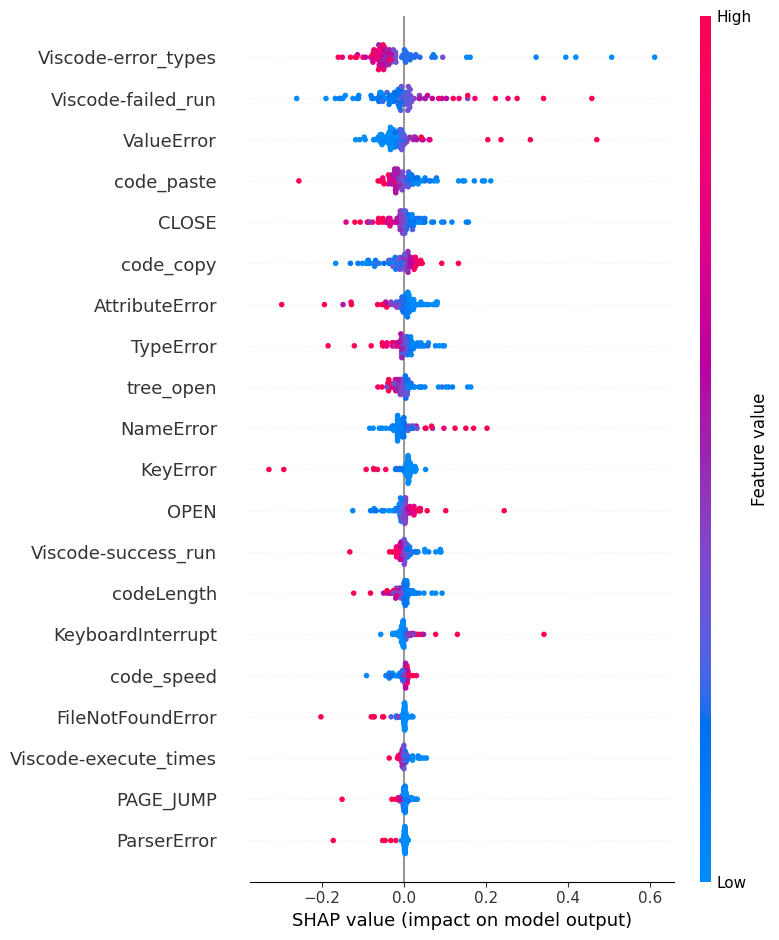

In [32]:
shap.summary_plot(shap_values, test_selected_x)